# Exploratory Data Analysis

Documentation about Introduction to Data Wrangling link: http://localhost:8888/notebooks/Data%20Wrangling%20Introduction.ipynb

Documentation about Data Wrangling Laptop Price Dataset link:
http://localhost:8891/notebooks/Data%20Wrangling%20Laptop%20Pricing%20Dataset.ipynb

Documentation about Exploratory Data Analysis Car Price Dataset link:
http://localhost:8888/notebooks/EDA%20Automobile.ipynb#


# Objectives

- Use the final results for a next project to create computer programs that learn from data to help with analysis. Improve how well these programs work by choosing important factors that affect what we're trying to predict. This will make our predictions more accurate and faster.

# Contents

1. Visualize individual feature patterns
2. Run descriptive statistical analysis on the dataset
3. Use groups and pivot tables to find the effect of categorical variables on price
4. Use Pearson Correlation to measure the interdependence between variables

# Import Libraries
**import requests In able for Line 4 to be successful and resolve the NameError**

If you're running the code within a Jupyter Notebook and if you haven't already installed the requests library, you will indeed need to install it using pip install requests in your terminal or command prompt.

After executing this command, you should be able to import and use the requests library in your notebook. Then, you can proceed with the rest of the code to download the dataset.

This code will download the dataset from the provided URL and save it with the specified filename in the current directory. You can then use pandas.read_csv() to read the CSV file into a DataFrame as usual.

In [1]:
!pip install requests

**To install Seaborn we use pip, the Python package manager.**

In [2]:
!pip install seaborn

**Import visualization packages "Matplotlib" and "Seaborn". Don't forget about "%matplotlib inline" to plot in a Jupyter notebook.**

**About %matplotlib inline**

A command used in Jupyter Notebook to tell it to display plots directly within the notebook itself right below the code cell created rather than in a separate window or file.

In [5]:
import requests
import pandas as pd                # managing the data
import numpy as np                 # mathematical operations
import seaborn as sns              # data visualization
import matplotlib.pyplot as plt    #additional plotting tools
%matplotlib inline                 
import scipy                       # statistical operations

# Read CSV file into Pandas DataFrame
*File Path provided by IBM Data Analysis Course in Coursera.*

1. Copy this URL and load it in browser.

filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

2. Excel file will come up.
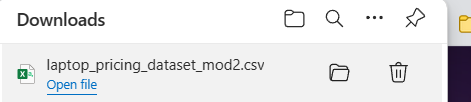
Download the file.

3. Copy path link
Look for the file and copy path.

4. Convert the path link into either**Raw String Literal** or **Escape Backslashes.** Use the new link as the file path.

In [ ]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [8]:
# Define the URL from which to download the data
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
response = requests.get(file_url)

# Use pandas to read the CSV file into a DataFrame
file_path = r"C:\Users\jocke\Documents\Aira\All Python Files\IBM Data Science\laptop_pricing_dataset_mod2.csv"

df = pd.read_csv(file_path, header = 0)

# Display the first few rows of the DataFrame to check if the data is imported correctly
df.head()


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [9]:
# Display whole DataFrame
display(df)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,234,234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,235,235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,236,236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0


### header = 0 explanation

<code>file_path = 'laptops.csv'
df = pd.read_csv(file_path, header = 0)</code>

When you read a CSV file into a DataFrame using <code>pd.read_csv()</code> in pandas, the header parameter determines which row in the CSV file is considered as the header, i.e., the row that contains the column names.

Use <code>header=0</code> when you are sure that the first row of the CSV file contains the column names. It is a good practice for clarity and explicitness in your code.

## Verify DataFrame Loading

Verify loading by displaying the dataframe summary using <code>df.info()</code>

In [10]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      238 non-null    int64  
 1   Unnamed: 0        238 non-null    int64  
 2   Manufacturer      238 non-null    object 
 3   Category          238 non-null    int64  
 4   GPU               238 non-null    int64  
 5   OS                238 non-null    int64  
 6   CPU_core          238 non-null    int64  
 7   Screen_Size_inch  238 non-null    float64
 8   CPU_frequency     238 non-null    float64
 9   RAM_GB            238 non-null    int64  
 10  Storage_GB_SSD    238 non-null    int64  
 11  Weight_pounds     238 non-null    float64
 12  Price             238 non-null    int64  
 13  Price-binned      238 non-null    object 
 14  Screen-Full_HD    238 non-null    int64  
 15  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(11), object(2)
memory u

None

## .info() result

A **non-null** values are those that do have data recorded. They are not empty or missing.

A **null-value** typically represents missing or empty data.

**Non-null count** The output indicates that each column in the dataset has 201 non-null values. This means that there are no missing or empty values (null values) in any of the columns.

# 1. Visualize individual feature patterns

### Task 1: Create graphs that show how <code>"CPU_frequency", "Screen_Size_inch"</code>, and <code>"Weight_pounds"</code> relate to <code>"Price"</code>. Additionally, display the correlation value of each feature with "Price".

<code>sns.regplot()</code>
- is a function provided by the Seaborn library, which is commonly used for statistical data visualization in Python. This function is used to create a scatter plot with a linear regression line fit to the data. It stands for "regression plot" in Seaborn

<code>plt.ylim(0,)</code>
-  sets the limits of the y-axis on the plot created by <code>sns.regplot</code>. Specifically, it sets the lower limit of the y-axis to 0 and leaves the upper limit unspecified.

(0.0, 3974.15)

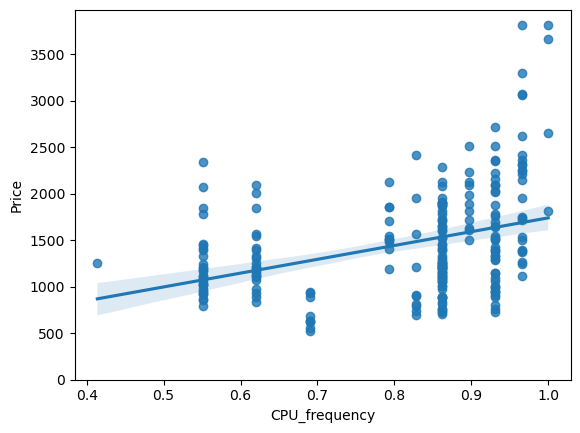

In [12]:
# CPU_frequency
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

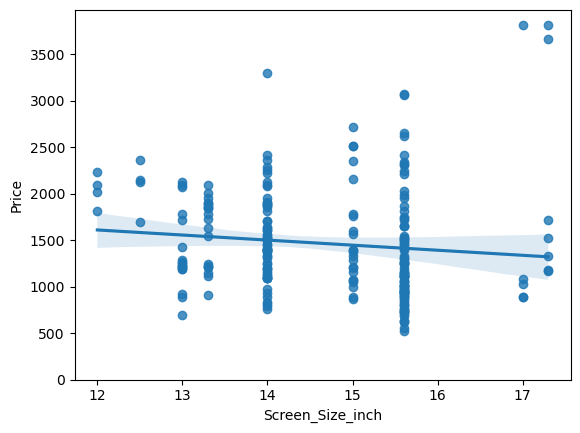

In [13]:
# Screen:size_inch
sns.regplot(x = "Screen_Size_inch", y = "Price", data = df)
plt.ylim(0,)

(0.0, 3974.15)

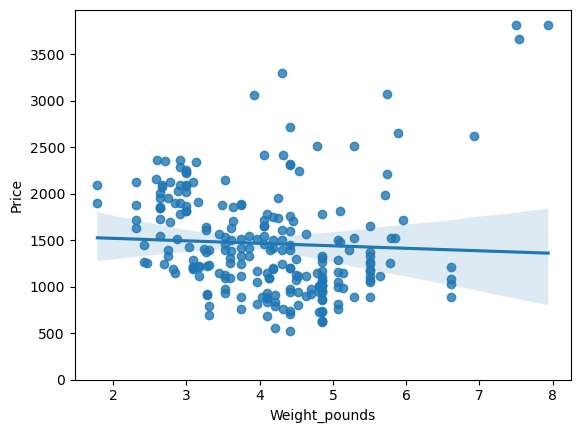

In [14]:
# Weight_pounds plot
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)

In [15]:
# Correlation values of the three attributes with Price
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


# Categorical Features

### Task 2: Generate Box plots for the different feature that hold categorical values. These features would be <code>"Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"</code>

<Axes: xlabel='Category', ylabel='Price'>

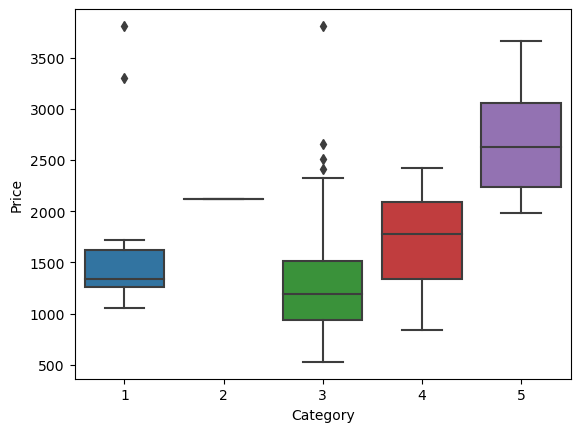

In [16]:
# Category Box plot
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

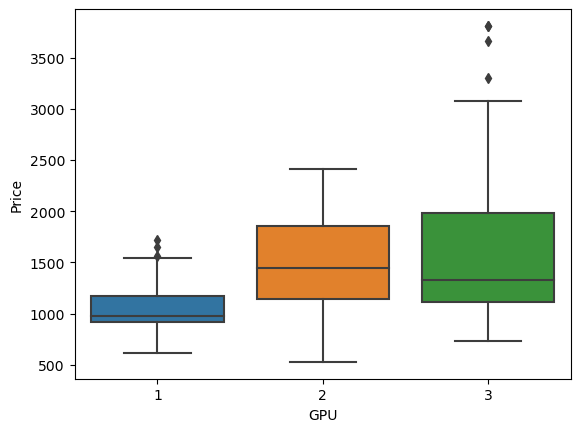

In [17]:
# GPU Box plot
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

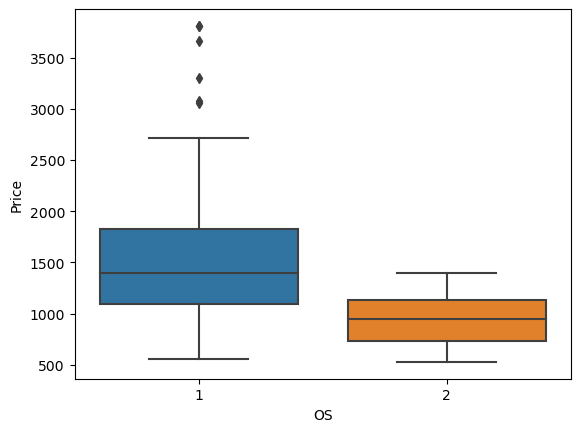

In [18]:
# OS Box plot
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

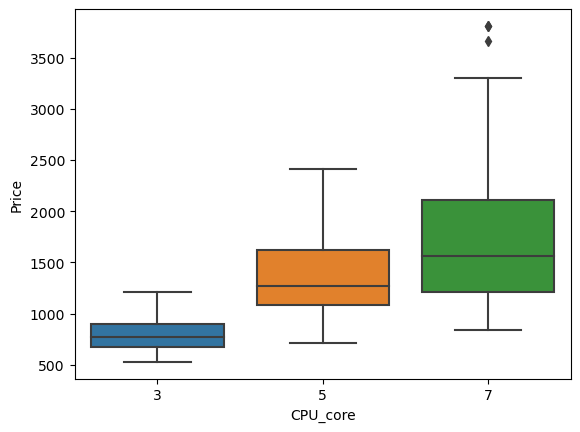

In [19]:
# CPU_core Box plot
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

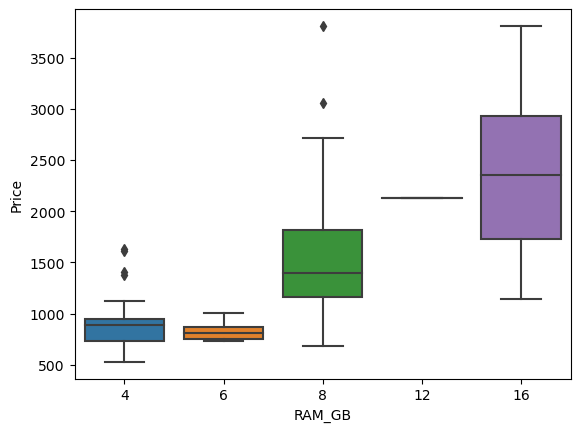

In [21]:
# RAM_GB Box plot
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

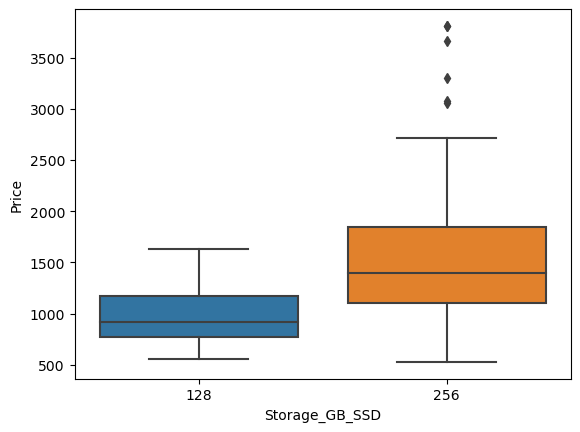

In [22]:
# Storage_GB_SSD Box plot
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

# 2. Run Descriptive Statistical Analysis on Dataset¶

## describe()
The <code>describe()</code> function gives important information about numerical data in a dataset. It shows:

**1. count:** How many data points there are

**2. mean** Average value

**3. Standard Deviation** How much data tends to vary around the mean

**4. min-max** smallest and largest values in the dataset

**5. IQR (Interquartile Range: 25%, 50% and 75%)** The range between the 25th and 75th percentiles, which helps understand where most of the data lies

### Task 3: Generate the statistical description of all the features being used in the data set. Include "object" data types as well.

In [24]:
display(df.describe())
display(df.describe(include=['object']))

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


# 3. Use groups and pivot tables to find the effect of categorical variables on price

### group by multiple variables
Group by multiple variables. For example, let's group by both **'drive-wheels'** and **'body-style'**. 

This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable **'grouped_test1'**.

### Task 4: Group the parameters <code>"GPU", "CPU_core" and "Price"</code> to make a pivot table and visualize this connection using the pcolor plot.

In [26]:
# Create the group
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
display(grouped_test1)

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [27]:
# Create the Pivot table
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
display(grouped_pivot)

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

### Visualize group by data into a pivot table

When we have data that's been grouped together using the <code>groupby</code> method, it's often helpful to visualize it in a pivot table format. 

A **pivot table** is similar to what you might see in Excel: it arranges data so that one variable is shown along the columns and another variable along the rows. It makes it easier to see patterns and relationships in the data.


### Code Breakdown:

<code>fig, ax = plt.subplots():</code> 
- This line creates a figure (fig) and a set of subplots (ax) using Matplotlib's <code>subplots()<code> function.

<code>im = ax.pcolor(grouped_pivot, cmap='RdBu'):</code>
- This line creates a pseudocolor plot **(heatmap)** using the data in <code>grouped_pivot</code> DataFrame with the colormap 'RdBu'.
    
<code>row_labels = grouped_pivot.columns.levels[1] and col_labels = grouped_pivot.index:</code> 
- These lines extract row and column labels from the DataFrame <code>grouped_pivot</code>.
    
<code>col_labels = grouped_pivot.index</code>
- Gets the labels for the rows from the index of the grouped_pivot DataFrame.
    
    
<code></code>

<code>ax.set_xticks()</code> and <code>ax.set_yticks():</code> 
- These lines set the positions of the ticks on the x-axis and y-axis, respectively.
   
<code>ax.set_xticklabels(row_labels, minor=False)</code>  
- Sets the labels for the x-axis ticks using the **row_labels**.
   
<code>ax.set_yticklabels(row_labels, minor=False)</code>  
- Sets the labels for the y-axis ticks using the **col_labels**.
 
  
<code>fig.colorbar(im):</code> 
- This line adds a colorbar to the plot, indicating the mapping of colors to values.
   

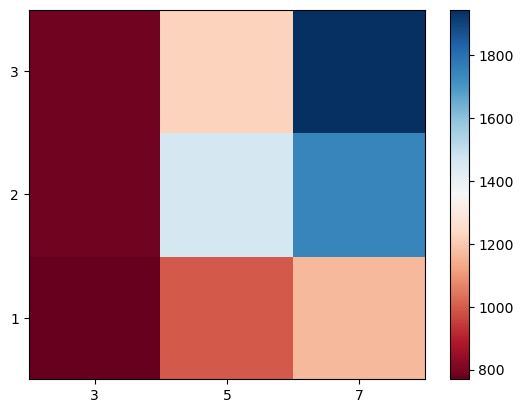

In [28]:
# Create the Plot
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

# 4. Use Pearson Correlation to measure the interdependence between variables

### Task 5: Use the <code>scipy.stats.pearsonr()</code> function to calculate the Pearson correlation coefficient and the associated p-values for each parameter that was tested earlier. This will help you figure out which parameters are likely to have a strong impact on the price of the laptops.

In [31]:
import scipy.stats as stats

for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for", param, "is", pearson_coef, "with a P-value of P =", p_value)


RAM_GB
The Pearson Correlation Coefficient for RAM_GB is 0.5492972971857845 with a P-value of P = 3.681560628842711e-20
CPU_frequency
The Pearson Correlation Coefficient for CPU_frequency is 0.36666555892588626 with a P-value of P = 5.502463350713296e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for Storage_GB_SSD is 0.2434207552181029 with a P-value of P = 0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for Screen_Size_inch is -0.11064420817118291 with a P-value of P = 0.08853397846830627
Weight_pounds
The Pearson Correlation Coefficient for Weight_pounds is -0.05031225837751554 with a P-value of P = 0.4397693853433899
CPU_core
The Pearson Correlation Coefficient for CPU_core is 0.4593977773355117 with a P-value of P = 7.912950127009034e-14
OS
The Pearson Correlation Coefficient for OS is -0.22172980114827376 with a P-value of P = 0.0005696642559246759
GPU
The Pearson Correlation Coefficient for GPU is 0.28829819888814273 with a P-value of P = 6.16